![VETkit logo](vetkit-logo.png)

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import vetkit as vk

In [2]:
top_dir = os.path.abspath("../checkpoint_runs")

In [3]:
vector_files = ["text8-1threads.vec", "text8-12threads.vec", "text8-12threads-r.vec"]
vocab_files = ["text8-1threads.voc", "text8-12threads.voc", "text8-12threads-r.voc"]
labels = ["1threads", "12threads", "12threads-r"]
topn_vectors = 100

In [ ]:
vectors = []
for vec, voc, l in zip(vector_files, vocab_files, labels):
    v = vk.WordEmbedding(vectors=os.path.join(top_dir, vec),
                         vocabulary=os.path.join(top_dir, voc),
                         label=l)
    
    # Calculate properties that require word pairs
    #  similarities
    #  cosine distances
    #  angle pairs
    #  point distances
    #v.set_processing_count(2, topn_vectors)
    v.process_attributes(2)
    
    # Calculate properties that require word triplets
    #  angle triplets
    #v.set_processing_count(3, 20)
    #v.process_attributes(3)
    
    vectors.append(v)

In [ ]:
vectors[0].vocabulary

In [ ]:
vectors[0]['the']

In [ ]:
# Word algebra
vectors[0]['the'] + vectors[0]['what']

In [ ]:
# Make analytics
ae = vk.WordEmbeddingAnalysis(vectors)

In [ ]:
# Histograms
ae.histogram(['angle pairs', 'distances', 'point distances'])
#ae.histogram(['angle pairs', 'distances', 'point distances'], file='demo-histogram.png')

In [ ]:
# Boxplot
ae.boxplot(['angle pairs', 'distances', 'point distances'])

In [ ]:
# Dimensionality reduction
#  PCA
#  t-SNE
#ae.tsne(dim=3)
ae.pca(dim=3)

In [15]:
# Clustering
#  Spectral
#  K-means
#  Mini-batch K-means
#  Birch
#  Mean shift
#  Agglomerative
#  Gaussian mixture model (expectation maximization)
#  Bayesian Gaussian mixture model (expectation maximization)
#  Minimum spanning tree
#  Affinity propagation
ae.kmeans(num_clusters=8)

([array([4, 4, 4, ..., 4, 4, 4], dtype=int32),
  array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  array([0, 0, 0, ..., 0, 0, 0], dtype=int32)],
 [KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=8, n_init=10, n_jobs=4, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=8, n_init=10, n_jobs=4, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=8, n_init=10, n_jobs=4, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)],
 ['1threads', '12threads', '12threads-r'])

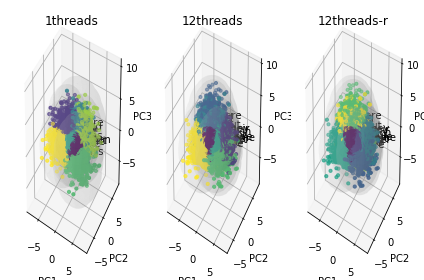

([array([[ 0.07932539,  0.01256202, -0.03885339],
         [ 0.07097915,  1.2116215 ,  1.4377102 ],
         [ 0.086657  ,  1.0760325 ,  0.51385385],
         ...,
         [ 0.14614405, -0.33181098, -0.08506215],
         [ 0.1944351 ,  0.11398794, -0.28096116],
         [ 0.16188173, -0.16022582,  0.04443645]], dtype=float32),
  array([[-0.07966664,  0.01542624, -0.02301232],
         [ 0.29983562,  0.9666344 ,  0.8267425 ],
         [-0.10220309,  0.8256774 ,  0.22016607],
         ...,
         [-0.17250964, -0.28677517, -0.21979222],
         [-0.41381752,  0.08133437, -0.25458193],
         [-0.14377274, -0.21797188, -0.18317258]], dtype=float32),
  array([[-0.08154064,  0.01510263, -0.02222666],
         [ 0.42059875,  1.0243174 ,  0.8830242 ],
         [ 0.04017965,  0.98399305,  0.18268816],
         ...,
         [-0.17508724, -0.28166047, -0.22189517],
         [-0.39987296,  0.07023419, -0.24969931],
         [-0.13932866, -0.21907672, -0.18386792]], dtype=float32)],
 [arra

In [16]:
ae.reduction_clustering(reduce='pca', cluster='kmeans', dim=3, num_clusters=8)

In [18]:
# Statistics
# ANOVA
ae.anova(['angle pairs', 'distances'], test='oneway')

# Correlations - against number of threads
ae.correlation(['angle pairs', 'distances'], y = [1, 1, 12])

angle pairs: 1threads,12threads,12threads-r,1threads,12threads,12threads-r
F-stat     0.447347  
p-value    0.639331  
angle pairs: 1threads,12threads,12threads-r,1threads,12threads,12threads-r
F-stat     0.493832  
p-value    0.610293  
angle pairs: 1threads,12threads,12threads-r,1threads,12threads,12threads-r
           mean       variance   skewness   kurtosis  
Coeff      0.235273   -0.535270  -0.612067  0.580440  
p-value    0.848803   0.640420   0.580677   0.605761  

angle pairs: 1threads,12threads,12threads-r,1threads,12threads,12threads-r
           mean       variance   skewness   kurtosis  
Coeff      0.236762   -0.571595  -0.636617  0.635178  
p-value    0.847828   0.612650   0.560666   0.561853  



In [ ]:
# Analogies
ae.analogy(infile="analogy.txt")